# Проект исследования тарифных планов сотовой связи

Вы аналитик компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.

Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

## Изучение данных из файла

### Первичный анализ данных

Перед началом анализа импортируем все необходимые для работы библиотеки и загрузим заданные датафреймы

In [1]:
# импортируем библиотеки для работы с данными, графиками и математическими операторами
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from functools import reduce
import scipy.stats as st

In [2]:
# два варианта загрузки датафреймов через связку try-except, в связи с тем, что часто работаю над проектом в среде Google Colab:
try:
  df_calls = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/calls.csv')
  df_internet = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/internet.csv')
  df_messages = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/messages.csv')
  df_tariffs = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/tariffs.csv')
  df_users = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/users.csv')
except:
  df_calls = pd.read_csv('/datasets/calls.csv')
  df_internet = pd.read_csv('/datasets/internet.csv')
  df_messages = pd.read_csv('/datasets/messages.csv')
  df_tariffs = pd.read_csv('/datasets/tariffs.csv')
  df_users = pd.read_csv('/datasets/users.csv')

Выведем общую информацию, количество пропусков, описание, первые строчки и описание всех представленных таблиц, а также возможное количество дубликатов.

#### Таблица `calls`

In [3]:
# информация по таблице
df_calls.info()

# первые 5 строк таблицы
display(df_calls.head())

# описаные таблицы
display(df_calls.describe())

# доля пропусков и дубликатов в таблице
print(f'Доля пропусков в таблице {df_calls.isna().mean().sum()}, количество дубликатов {df_calls.duplicated().sum()}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


Доля пропусков в таблице 0.0, количество дубликатов 0


#### Таблица `internet`

In [4]:
# информация по таблице
df_internet.info()

# первые 5 строк таблицы
display(df_internet.head())

# описаные таблицы
display(df_internet.describe())

# доля пропусков и дубликатов в таблице
print(f'Доля пропусков в таблице {df_internet.isna().mean().sum()}, количество дубликатов {df_internet.duplicated().sum()}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


,Unnamed: 0,mb_used,user_id
count,149396.000000,149396.000000,149396.000000
mean,74697.500000,370.192426,1252.099842
std,43127.054745,278.300951,144.050823
min,0.000000,0.000000,1000.000000
25%,37348.750000,138.187500,1130.000000
50%,74697.500000,348.015000,1251.000000
75%,112046.250000,559.552500,1380.000000
max,149395.000000,1724.830000,1499.000000


Доля пропусков в таблице 0.0, количество дубликатов 0


#### Таблица `messages`

In [5]:
# информация по таблице
df_messages.info()

# первые 5 строк таблицы
display(df_messages.head())

# описаные таблицы
display(df_messages.describe())

# доля пропусков и дубликатов в таблице
print(f'Доля пропусков в таблице {df_messages.isna().mean().sum()}, количество дубликатов {df_messages.duplicated().sum()}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


,user_id
count,123036.000000
mean,1256.989410
std,143.523967
min,1000.000000
25%,1134.000000
50%,1271.000000
75%,1381.000000
max,1499.000000


Доля пропусков в таблице 0.0, количество дубликатов 0


#### Таблица `tariffs`

In [6]:
# информация по таблице
df_tariffs.info()

# первые 5 строк таблицы
display(df_tariffs.head())

# описаные таблицы
display(df_tariffs.describe())

# доля пропусков и дубликатов в таблице
print(f'Доля пропусков в таблице {df_tariffs.isna().mean().sum()}, количество дубликатов {df_tariffs.duplicated().sum()}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,1250.000000,175.000000,2.000000,2.000000
std,671.751442,10861.160159,1767.766953,989.949494,35.355339,1.414214,1.414214
min,50.000000,15360.000000,500.000000,550.000000,150.000000,1.000000,1.000000
25%,287.500000,19200.000000,1125.000000,900.000000,162.500000,1.500000,1.500000
50%,525.000000,23040.000000,1750.000000,1250.000000,175.000000,2.000000,2.000000
75%,762.500000,26880.000000,2375.000000,1600.000000,187.500000,2.500000,2.500000
max,1000.000000,30720.000000,3000.000000,1950.000000,200.000000,3.000000,3.000000


Доля пропусков в таблице 0.0, количество дубликатов 0


#### Таблица `users`

In [7]:
# информация по таблице
df_users.info()

# первые 5 строк таблицы
display(df_users.head())

# описаные таблицы
display(df_users.describe())

# доля пропусков и дубликатов в таблице
print(f'Доля пропусков в таблице {df_users.isna().mean().sum()}, количество дубликатов {df_users.duplicated().sum()}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


,user_id,age
count,500.000000,500.00000
mean,1249.500000,46.58800
std,144.481833,16.66763
min,1000.000000,18.00000
25%,1124.750000,32.00000
50%,1249.500000,46.00000
75%,1374.250000,62.00000
max,1499.000000,75.00000


Доля пропусков в таблице 0.924, количество дубликатов 0


In [8]:
# осмотрим данные, находящиеся в столбце churn_date имеющим пропуски
df_users['churn_date'].unique()

array([nan, '2018-10-05', '2018-12-18', '2018-11-21', '2018-10-03',
       '2018-10-14', '2018-12-09', '2018-12-11', '2018-12-26',
       '2018-08-31', '2018-12-03', '2018-12-23', '2018-11-07',
       '2018-12-16', '2018-12-20', '2018-11-30', '2018-12-21',
       '2018-08-17', '2018-09-02', '2018-10-04', '2018-11-13',
       '2018-11-22', '2018-10-28', '2018-11-26', '2018-11-27',
       '2018-11-16', '2018-10-27', '2018-12-30', '2018-09-27',
       '2018-12-25', '2018-12-14', '2018-12-24', '2018-09-26',
       '2018-10-25'], dtype=object)

In [9]:
# рассмотрим уникальные значения столбца city, на случай, если там присутствует различное написание
# одного и того же населенного пункта
df_users['city'].unique()

array(['Краснодар', 'Москва', 'Стерлитамак', 'Новокузнецк',
       'Набережные Челны', 'Ульяновск', 'Челябинск', 'Пермь', 'Тюмень',
       'Самара', 'Санкт-Петербург', 'Иваново', 'Чебоксары', 'Омск', 'Уфа',
       'Томск', 'Чита', 'Мурманск', 'Петрозаводск', 'Тверь',
       'Екатеринбург', 'Махачкала', 'Вологда', 'Череповец', 'Ярославль',
       'Сочи', 'Хабаровск', 'Ставрополь', 'Рязань', 'Улан-Удэ', 'Тула',
       'Саратов', 'Ростов-на-Дону', 'Казань', 'Иркутск', 'Курск',
       'Калуга', 'Якутск', 'Астрахань', 'Химки', 'Владикавказ',
       'Волгоград', 'Саранск', 'Ижевск', 'Новосибирск', 'Брянск',
       'Тольятти', 'Нижний Тагил', 'Орёл', 'Белгород', 'Воронеж',
       'Волжский', 'Курган', 'Барнаул', 'Красноярск', 'Архангельск',
       'Липецк', 'Кемерово', 'Киров', 'Сургут', 'Пенза', 'Магнитогорск',
       'Нижний Новгород', 'Кострома', 'Владивосток', 'Тамбов', 'Балашиха',
       'Севастополь', 'Калининград', 'Оренбург', 'Смоленск',
       'Нижневартовск', 'Владимир', 'Новороссий

Согласно документации у нас 5 таблиц, имеющих следующие столбцы:

Таблица calls (информация о звонках):
* `id` — уникальный номер звонка
* `call_date` — дата звонка
* `duration` — длительность звонка в минутах
* `user_id` — идентификатор пользователя, сделавшего звонок

Таблица internet (информация об интернет-сессиях):
* `id` — уникальный номер сессии
* `mb_used` — объём потраченного за сессию интернет-трафика (в мегабайтах)
* `session_date` — дата интернет-сессии
* `user_id` — идентификатор пользователя

Таблица messages (информация о сообщениях):
* `id` — уникальный номер звонка
* `message_date` — дата сообщения
* `user_id` — идентификатор пользователя, отправившего сообщение

Таблица tariffs (информация о тарифах):
* `tariff_name` — название тарифа
* `rub_monthly_fee` — ежемесячная абонентская плата в рублях
* `minutes_included` — количество минут разговора в месяц, включённых в абонентскую плату
* `messages_included` — количество сообщений в месяц, включённых в абонентскую плату
* `mb_per_month_included` — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
* `rub_per_minute` — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
* `rub_per_message` — стоимость отправки сообщения сверх тарифного пакета
* `rub_per_gb` — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

Таблица users (информация о пользователях):
* `ser_id` — уникальный идентификатор пользователя
* `first_name` — имя пользователя
* `last_name` — фамилия пользователя
* `age` — возраст пользователя (годы)
* `reg_date` — дата подключения тарифа (день, месяц, год)
* `churn_date` — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
* `city` — город проживания пользователя
* `tarif` — название тарифного плана

Наименования столбцов выполнены без нарушения стиля.

### Вывод

В таблицах находятся данные о пользователях сотовой связи, объемы пользования связью и тарифы.

В данных обнаружены следующие возможные проблемы:

Таблица calls:
* столбец `call_date` имеет строчный тип данных, а содержит информацию о дате звонка, необходимо перевести в тип данных datetime
* столбец `duration` имеет 0 значения, что означает либо пропущенный звонок, либо пользователь не совершал звонков за расчетный период. Оставляем 0.

Таблица internet:
* содержит столбец `Unnamed: 0` который дублирует индексы таблицы и отсутствуюет в технической документации к проекту, необходимо удалить;
* столбец `mb_used` имеет 0 значения. Это значит пользователь не заходил в интернет за расчетный период. Оставляем 0 
* столбец `session_date` имеет строчный тип данных, а содержит информацию о дате пользования интернетом, необходимо перевести в тип данных datetime

Таблица messages:
* столбец `message_date` имеет строчный тип данных, а содержит информацию о дате отправки сообщения, необходимо перевести в тип данных datetime

Таблица users:
* столбец `reg_date` имеет строчный тип данных, а содержит информацию о дате регистрации пользователя, необходимо перевести в тип данных datetime
* пропуски в столбце `churn_date` означает, что тариф ещё действовал на момент выгрузки данных, поэтому оставляем. Также данный столбец имеет строчный тип данных, а содержит информацию о дате прекращения пользования тарифом, необходимо перевести в тип данных datetime


Данных достаточно для анализа, необходимо устранить ошибки и перевести некоторые столбцы к нужному типа данных. Дубликаты и критичные пропуски в данных отсутствуют.

## Подготовка данных

Приведем данные к нужным типам, исправим обнаруженные ошибки в данных. Выполним необходимые округления.

Произведем следующие расчеты для каждого пользователя:

* количество сделанных звонков и израсходованных минут разговора по месяцам;
* количество отправленных сообщений по месяцам;
* объем израсходованного интернет-трафика по месяцам;
* помесячную выручку с каждого пользователя.

### Изменение типов данных

При первичном анализе данных обнаружили, что некоторые данные имеют неправильный тип данных.

Столбцы, имеющие тип данных *object*, которые необходимо привести к типу *datetime*:

* `df_calls['call_date']` 
* `df_internet['session_date']`
* `df_messages['message_date']`
* `df_users['reg_date']`
* `df_users['churn_date']`

Выполним изменение типов данных указанных столбцов:

In [10]:
# изменение типов данных с object на datetime
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format='%Y-%m-%d')
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], format='%Y-%m-%d')
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'], format='%Y-%m-%d')
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'], format='%Y-%m-%d')
df_users['churn_date'] = pd.to_datetime(df_users['churn_date'], format='%Y-%m-%d')

### Исправление ошибок

При первичном анализе был обнаружен лишний столбец `df_internet['Unnamed: 0']` который дублирует индексы таблицы. Вероятно, он мог ошибочно создататься при сборе данных в таблицу.

Удалим данный столбец и перезапишем исходный датафрейм internet

In [11]:
# удалим столбец Unnamed: 0 и перезапишем таблицу internet с помощью атрибута Inplace
df_internet.drop(columns = ['Unnamed: 0'], axis = 1, inplace=True)

### Округление данных

В соответствии с правилами оператора «Мегалайн» необходимо округлить в **большую** сторону следующие данные:
* время звонка `df_calls['duration']` округляются до минут (звонок длительностью 1 секунду будет засчитан как 1 минута.)
* общий объем трафика за месяц `df_internet['mb_used']` с мегабайт округляется до гигабайт (объем 1025 Мб будет засчитан как 2 Гб).

Обработаем столбец `df_calls['duration']`.

Для этого, в таблице `df_calls` создадим новый столбец `['duration_minutes']`. Во него добавим округленные в большую сторону значения данные.

In [12]:
# округлим значения в большую сторону методом ceil 
df_calls['duration_minutes'] = np.ceil(df_calls['duration'])

Обработкой `df_internet['mb_used']` займемся позднее, после того как создадим сводную таблицу и рассчитаем сумму использованного трафика за месяц отдельно взятым пользователем.

### Расчет данных

Перед началом расчетов необходимо выделить месяц пользования услугами (звонки, интернет, сообщения) для каждой таблицы `calls`, `internet` и `messages`. Для этого создадим отдельный столбец `month` в каждой таблице и добавим туда данные о месяце.

In [13]:
# создадим новые столбцы в необходимых таблицах и добавим туда данные по месяцам, используя функцию dt.month
df_calls['month'] = df_calls['call_date'].dt.month
df_messages['month'] = df_messages['message_date'].dt.month
df_internet['month'] = df_internet['session_date'].dt.month

Затем создадим сводные таблицы по данным `user_id` и `month` для соответствующих таблиц.

#### Сводная таблица `calls`

In [14]:
# создадим сводную таблицу по данным столбцов user_id и month, переименуем столбцы и выведем таблицу на экран
calls_pivot = pd.pivot_table(df_calls, index=['user_id', 'month'], values='duration_minutes', aggfunc=['count','sum'])
calls_pivot.columns = ['calls_count_month', 'duration_month']
calls_pivot

calls_count_month  duration_month
user_id month                                   
1000    5                     22           159.0
        6                     43           172.0
        7                     47           340.0
        8                     52           408.0
        9                     58           466.0
...                          ...             ...
1498    10                    41           247.0
1499    9                      9            70.0
        10                    68           449.0
        11                    74           612.0
        12                    69           492.0

[3174 rows x 2 columns]

#### Сводная таблица `internet`

При создании сводной таблицы по данному датафрейму вернемся к округлению данных использованного трафика. Согласно правилам оператора, необходимо округлить в большую сторону мегабайты в гигабайты.

Для этого округлим значения столбца `mb_used`, переведем их в целочисленный тип данных *int* и переименуем в `gb_used_month`

In [15]:
# создадим сводную таблицу по данным столбцов user_id и month,
# переведем мегабайта в гигабайты, поделив значения на 1024 и округлим в большую сторону
# выведем таблицу на экран
internet_pivot = pd.pivot_table(df_internet, index=['user_id', 'month'], values='mb_used', aggfunc='sum')
internet_pivot['mb_used'] = np.ceil(internet_pivot['mb_used'] / 1024)
internet_pivot.columns = ['gb_used_month']
internet_pivot

gb_used_month
user_id month               
1000    5                3.0
        6               23.0
        7               14.0
        8               14.0
        9               15.0
...                      ...
1498    10              21.0
1499    9                2.0
        10              18.0
        11              18.0
        12              13.0

[3203 rows x 1 columns]

#### Сводная таблица `messages`

In [16]:
# создадим сводную таблицу по данным столбцов user_id и month, переименуем столбцы и выведем таблицу на экран
messages_pivot = pd.pivot_table(df_messages, index=['user_id', 'month'], values='id', aggfunc=['count'])
messages_pivot.columns = ['messages_count_month']
messages_pivot

messages_count_month
user_id month                      
1000    5                        22
        6                        60
        7                        75
        8                        81
        9                        57
...                             ...
1498    10                       42
1499    9                        11
        10                       48
        11                       59
        12                       66

[2717 rows x 1 columns]

#### Общая сводная таблица 

Теперь необходимо собрать воедино созданные сводные таблицы `calls_pivot`, `internet_pivot` и `messages_pivot`.

После итогового объединения данных возникнут пропущенные значения (пользователь мог не звонить/не писать сообщений/не пользоваться интернетом в течении месяца), которые необходимо будет заменить на нулевые значения.

Также произведем замену типа данных с дробей *float* на целочисленные значения *int*

In [17]:
# для сбора трех сводных таблиц создадим список из них и применим методы reduce и merge
# пропущенные значения заменим на 0 и переведем данные таблицы в целочисленные значения
dfs = [calls_pivot, internet_pivot, messages_pivot]
df_merged = reduce(lambda left,right: pd.merge(
    left, right, on=['user_id', 'month'], how='outer'), dfs).fillna(0).astype('int64')

In [18]:
df_merged.shape

(3214, 4)

In [19]:
df_merged.reset_index().user_id.nunique()

498

Осталось соотнести каждого пользователя с используемым тарифом. Для этого воспользуемся данными из таблицы `users`

In [20]:
# заполним новый столбец tariff общей сводной таблицы данными
# взяв данные о тарифах из таблицы users
for user in df_merged.index:
    df_merged.loc[user, 'tariff'] = df_users.loc[user[0]-1000, 'tariff']

Для проверки выведем 10 первых строк общей сводной таблицы revenue

In [21]:
# первые 10 строк
df_merged.head(10) 

calls_count_month  duration_month  gb_used_month  \
user_id month                                                     
1000    5                     22             159              3   
        6                     43             172             23   
        7                     47             340             14   
        8                     52             408             14   
        9                     58             466             15   
        10                    57             350             15   
        11                    43             338             15   
        12                    46             333             10   
1001    11                    59             430             18   
        12                    63             414             14   

               messages_count_month tariff  
user_id month                               
1000    5                        22  ultra  
        6                        60  ultra  
        7                        75  ultra  
        8                        81  ultra  
        9                        57  ultra  
        10                       73  ultra  
        11                       58  ultra  
        12                       70  ultra  
1001    11                        0  smart  
        12                        0  smart

#### Расчет помесячной выручки каждого пользователя

Рассчитаем помесячную выручку с каждого пользователя с помощью функции. Полученные данные добавим в новый столбец `revenue`.

In [22]:
# напишем функцию для расчета выручки для каждого пользователя за месяц
def revenue(row):
    """
    Функция возвращает расчет выручки для каждого клиента, используя правило:
    в зависимости от тарифа smart или ultra расчитывает разницу между бесплатным лимитом звонков/трафика интернета/сообщений
    и фактической суммой длительности звонков/трафика интернета/сообщений.
    Если есть превышение тарифных объемов, полученный остаток умножается на значения тарифного плана.
    Затем полученные значения суммируются с ежемесячной абонентской платой
    """
    duration = row['duration_month']
    gb_used = row['gb_used_month']
    messages = row['messages_count_month']
    tariff = row['tariff']
    if tariff == 'smart':
        extra_duration = duration - df_tariffs.loc[0, 'minutes_included']
        extra_gb = gb_used - (df_tariffs.loc[0, 'mb_per_month_included'] / 1024)
        extra_messages = messages - df_tariffs.loc[0, 'messages_included']
        if extra_duration < 0: 
          extra_duration = 0
        if extra_gb < 0: 
          extra_gb = 0
        if extra_messages < 0: 
          extra_messages = 0
        return (df_tariffs.loc[0, 'rub_monthly_fee'] + 
                df_tariffs.loc[0, 'rub_per_minute'] * extra_duration +
                df_tariffs.loc[0, 'rub_per_gb'] * extra_gb +
                df_tariffs.loc[0, 'rub_per_message'] * extra_messages
                )
    else:
        extra_duration = duration - df_tariffs.loc[1, 'minutes_included']
        extra_gb = gb_used - (df_tariffs.loc[1, 'mb_per_month_included'] / 1024)
        extra_messages = messages - df_tariffs.loc[1, 'messages_included']
        if extra_duration < 0: 
          extra_duration = 0
        if extra_gb < 0: 
          extra_gb = 0
        if extra_messages < 0: 
          extra_messages = 0
        return (df_tariffs.loc[1, 'rub_monthly_fee'] + 
                df_tariffs.loc[1, 'rub_per_minute'] * extra_duration + 
                df_tariffs.loc[1, 'rub_per_gb'] * extra_gb + 
                df_tariffs.loc[1, 'rub_per_message'] * extra_messages)

# применим вновь созданную функцию к общей сводной таблице
df_merged['revenue'] = df_merged.apply(revenue, axis=1)

# и выведем первые 10 строк для проверки
df_merged.head(10)

calls_count_month  duration_month  gb_used_month  \
user_id month                                                     
1000    5                     22             159              3   
        6                     43             172             23   
        7                     47             340             14   
        8                     52             408             14   
        9                     58             466             15   
        10                    57             350             15   
        11                    43             338             15   
        12                    46             333             10   
1001    11                    59             430             18   
        12                    63             414             14   

               messages_count_month tariff  revenue  
user_id month                                        
1000    5                        22  ultra   1950.0  
        6                        60  ultra   1950.0  
        7                        75  ultra   1950.0  
        8                        81  ultra   1950.0  
        9                        57  ultra   1950.0  
        10                       73  ultra   1950.0  
        11                       58  ultra   1950.0  
        12                       70  ultra   1950.0  
1001    11                        0  smart   1150.0  
        12                        0  smart    550.0

In [23]:
df_merged['revenue'].describe()

count    3214.000000
mean     1529.076229
std       798.251091
min       550.000000
25%       750.000000
50%      1653.500000
75%      1950.000000
max      6770.000000
Name: revenue, dtype: float64

### Вывод

В ходе подготовки данных выполнили следующее:
* изменили типы данных, где это было необходимо с *object* на *datetime*
* удалили ошибочный столбец `df_internet['Unnamed: 0']`
* собрали сводные таблицы с данными по звонкам, интернету и сообщения. Затем объединили эти таблицы в итоговую. При этом округлили необъодимые значения и привели их к целочисленному типу данных.
* добавили расчет ежемесячного дохода с пользователяв итоговую таблицу.

Можно приступать к анализу собранных данных.

## Анализ данных

Опишем поведение клиентов оператора, исходя из выборки. Рассмотрим сколько минут разговора/гигабайт трафика/количества сообщений в месяц требуется пользователям каждого тарифа в месяц.

Затем рассчитаем среднее количество, дисперсию, стандартные отклонения и построим гистограммы.

### Расчет средних показателей пользования тарифными планами в месяц

Создадим сводную таблицу со средними показателями минут разговора, использованных гигабайт трафика и отправленных сообщений в месяц каждым пользователем.

In [24]:
# соберем сводную таблицу с данными из df_merged, применив к ним функцию среднего значения mean
df_mean = df_merged.pivot_table(index='user_id', 
                                values = ['duration_month', 'gb_used_month', 
                                          'messages_count_month', 'revenue'], aggfunc='mean')
df_mean.columns = ['duration_mean', 'gb_used_mean', 'messages_mean', 'revenue_mean']

# добавим к сводной таблице тарифный план каждого пользователя
for user_id in df_users['user_id']:
    df_mean.loc[user_id, 'tariff'] = df_users.loc[user_id-1000, 'tariff']

# выведем первые 10 строк сводной таблицы
df_mean.head(10)

,duration_mean,gb_used_mean,messages_mean,revenue_mean,tariff
user_id,,,,,
1000,320.750000,13.625000,62.0,1950.000000,ultra
1001,422.000000,16.000000,0.0,850.000000,smart
1002,216.714286,16.714286,10.0,1035.714286,smart
1003,764.400000,11.800000,76.0,1950.000000,ultra
1004,123.375000,18.750000,149.0,1950.000000,ultra
1005,550.416667,8.583333,46.0,827.000000,smart
1006,318.272727,15.090909,0.0,931.818182,smart
1007,486.555556,14.888889,25.0,913.444444,smart
1008,339.000000,13.000000,56.0,568.000000,smart


После свода новой таблицы, проверим количество возможно появившихся пропусков

In [25]:
# посчитаем количество пропусков
display(df_mean.isna().mean().apply('{:.2%}'.format))

# посмотрим, находятся ли они в одних строках
df_mean[df_mean['duration_mean'].isna()].isna()

duration_mean    0.40%
gb_used_mean     0.40%
messages_mean    0.40%
revenue_mean     0.40%
tariff           0.00%
dtype: object

,duration_mean,gb_used_mean,messages_mean,revenue_mean,tariff
user_id,,,,,
1128,True,True,True,True,False
1371,True,True,True,True,False


В таблице появилось 2 строчки с пропусками, но т.к. они составляют незначительную долю, всего 0,4% от общей таблицы, рекомендуется их удалить.

In [26]:
# удалим пропуски из таблицы df_mean и перезапишем ее
df_mean.dropna(inplace=True)

### Расчет статистических величин

Соберем сводную таблицу по тарифам и рассчитаем среднее количество, дисперсию и стандартное отклонение.

In [27]:
# соберем сводную таблицу по тарифам, посчитав среднее/дисперсию/стандартное отклонение
# для среднего потребления всех видов услуг в месяц пользователем
df_analysis = df_mean.pivot_table(index='tariff', values=['duration_mean', 'gb_used_mean', 'messages_mean'], 
                                  aggfunc={'duration_mean': [np.mean, np.var, np.std],
                                           'gb_used_mean': [np.mean, np.var, np.std],
                                           'messages_mean': [np.mean, np.var, np.std]})

# и выведем эту сводную таблицу на экран
df_analysis

duration_mean                           gb_used_mean            \
                mean         std           var         mean       std   
tariff                                                                  
smart     419.634803  145.031543  21034.148607    16.308519  3.501643   
ultra     527.821819  281.786359  79403.551850    19.588446  8.116120   

                  messages_mean                          
              var          mean        std          var  
tariff                                                   
smart   12.261503     32.352078  26.512448   702.909910  
ultra   65.871402     54.030743  46.366246  2149.828793

In [28]:
df_analysis.T

tariff                     smart         ultra
duration_mean mean    419.634803    527.821819
              std     145.031543    281.786359
              var   21034.148607  79403.551850
gb_used_mean  mean     16.308519     19.588446
              std       3.501643      8.116120
              var      12.261503     65.871402
messages_mean mean     32.352078     54.030743
              std      26.512448     46.366246
              var     702.909910   2149.828793

Построим гистограммы и диаграммы размаха по статистическим данным относительно обоих тарифов.

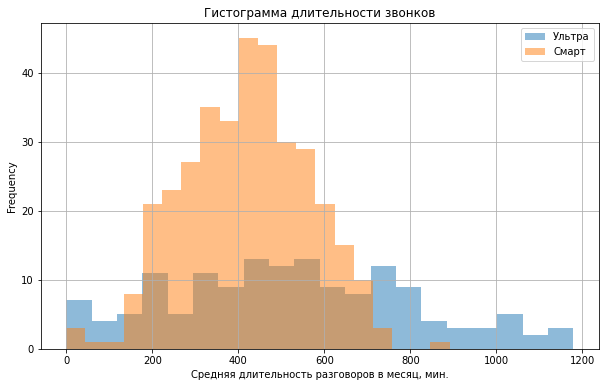

In [29]:
# используя цикл построим гистограмму средней длительности звонков пользователей в месяц
# для обоих тарифо
for tariff in ['ultra', 'smart']:
    df_mean.query('tariff == @tariff')['duration_mean'].plot.hist(
        bins=20, alpha=0.5, figsize=(10, 6), 
        grid=True, title='Гистограмма длительности звонков').set(xlabel='Средняя длительность разговоров в месяц, мин.')
    plt.legend(['Ультра', 'Смарт'])

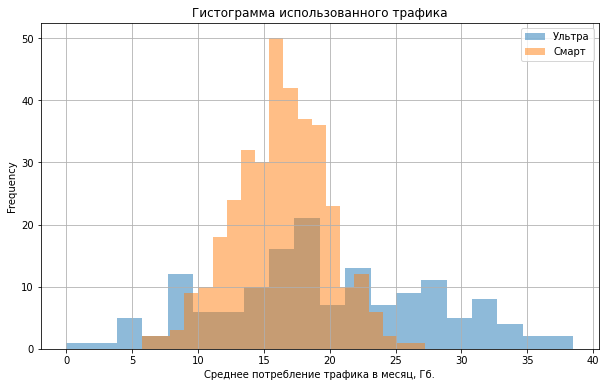

In [30]:
# используя цикл построим гистограмму среднего количества затраченного трафика
# пользователем в месяц для обоих тарифов  
for tariff in ['ultra', 'smart']:
    df_mean.query('tariff == @tariff')['gb_used_mean'].plot.hist(
        bins=20, alpha=0.5, figsize=(10, 6), 
        grid=True, title='Гистограмма использованного трафика').set(xlabel='Среднее потребление трафика в месяц, Гб.')
    plt.legend(['Ультра', 'Смарт'])

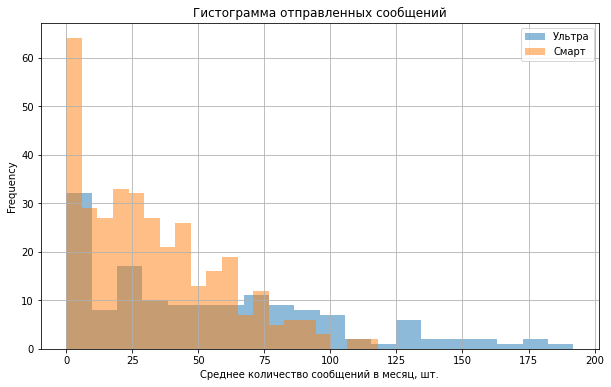

In [31]:
# используя цикл построим гистограмму среднего количества отправленных сообщений
# пользователем в месяц для обоих тарифов
for tariff in ['ultra', 'smart']:
    df_mean.query('tariff == @tariff')['messages_mean'].plot.hist(
        bins=20, alpha=0.5, figsize=(10, 6), 
        grid=True, title='Гистограмма отправленных сообщений').set(xlabel='Среднее количество сообщений в месяц, шт.')
    plt.legend(['Ультра', 'Смарт'])

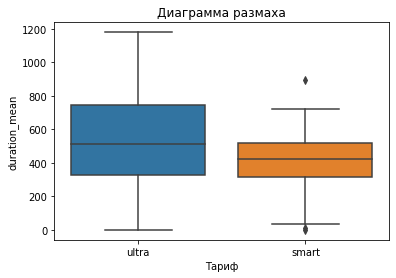

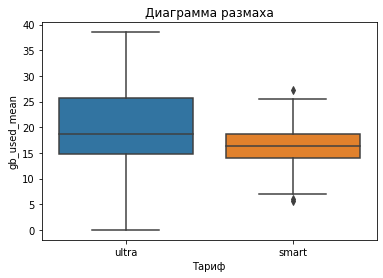

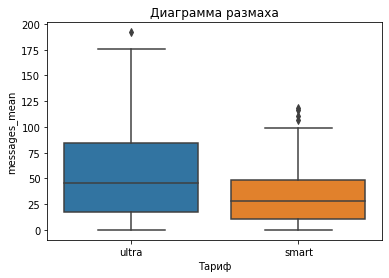

In [32]:
# циклом построим три диаграммы размаха для каждого параметра по обоим тарифам
for column in ['duration_mean', 'gb_used_mean', 'messages_mean']:
    sns.boxplot(x='tariff', y=column, data=df_mean).set(
        title='Диаграмма размаха', xlabel='Тариф')
    plt.show()

### Вывод

Проанализируем распределение данных по гистограммам:
1. Средняя продолжительности звонка в месяц:
* "Смарт" имеет нормально распределение с небольшим отрицательным смещением;
* "Ультра" имеет нормальное распределение.
2. Среднее потребление трафика в месяц:
* "Смарт" нормально распределен с ярко выраженной модой в районе 15 Гб (включенных в тарифный пакет).
* "Ультра" нормально распределен с положительным смещением.
3. Среднее количество отправленных сообщений: "Смарт" и "Ультра" характеризуются распределением Пуассона с пиком в 0 значении. Это может быть связано с тем, что с развитием интернета и мессенджеров люди стали меньше пользоваться стандартными сообщениями (в том числе я). Что интересно, на тарифе "Смарт" присутствуют выбросы свыше 100, т.е. даже с пиком нулевого значения есть пользователи, которым не хватает 50 сообщений в тарифном пакете.

Исходя из расчитанных данных, мы видим, что **среднее, дисперсия и стандартное отклонение больше у пользователей тарифов "Ультра"**. 

На диаграмме размах видны выбросы по данным тарифа "Смарт". Это может быть связано с тем, что **пользователи "Смарт" чаще выходят за рамки тарифного пакета**.

Проанализировав данные пользователей, можно сказать, что пользователи "Ультра" более гибки в пользовании услугами связи, когда пользователи "Смарт" стараются ограничивать себя рамками заданного тарифом объема.

## Проверка гипотез

Проверим две гипотезы:
* средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
* средняя выручка пользователи из Москвы отличается от выручки пользователей из других регионов.

### Сравнение средней выручки пользоватей между тарифами

Для начала сформулируем нулевую `H0` и альтернативную `Н1` гипотезы:
* `H0` - средняя выручка пользователей тарифов "Смарт" и "Ультра" равна
* `Н1` - средняя выручка пользователей тарифов "Смарт" и "Ультра" различается.

Для сравнения этих гипотез воспользуемся t-тестом Стьюдента. Пороговое значение alpha примем равным 1%. Мы уверены в том, что дисперсия двух выборок разная.

In [33]:
# назначим переменные для выручки revenue по тарифам "Смарт" и "Ультра" 
smart = df_merged.query('tariff == "smart"')['revenue']
ultra = df_merged.query('tariff == "ultra"')['revenue']

# alpha назначим 1%, дисперсия выборок разная
alpha = .01
results = st.ttest_ind(smart, ultra, equal_var=False)

# рассчитаем p-value и выведем значения
print('р-значение:', results.pvalue)
if (results.pvalue < alpha):
    print('Cредняя выручка пользователей тарифов "Смарт" и "Ультра" различается')
else:
    print('Cредняя выручка пользователей тарифов "Смарт" и "Ультра" равна')

р-значение: 4.2606313931076085e-250
Cредняя выручка пользователей тарифов "Смарт" и "Ультра" различается


In [34]:
# дополнительно рассчитаем среднюю выручку по тарифам для подкрепления гипотезы
# также рассчитаем превышение абонентской платы в рублях и в долях
df_merged_pivot = df_merged.pivot_table(index='tariff', values='revenue', aggfunc='mean')
df_merged_pivot.reset_index(inplace=True)
df_merged_pivot['extra_fee'] = df_merged_pivot['revenue'] - df_tariffs['rub_monthly_fee']
df_merged_pivot['extra_fee_share'] = 1 - df_tariffs['rub_monthly_fee'] / df_merged_pivot['revenue']
df_merged_pivot

,tariff,revenue,extra_fee,extra_fee_share
0,smart,1289.973531,739.973531,0.573635
1,ultra,2070.152284,120.152284,0.058040


Расчет показал, что значение p-value меньше 1%. Соответственно мы подтвердили, что **средняя выручка пользователей тарифов "Смарт" и "Ультра" различается**. Это же подтвердил расчет средней выручки по таблице. Также увидели, что средний пользователь тарифа "Смарт" превышает плату по абонентской плате на 57%, когда средний пользователь "Смарт" всего лишь на 5%.

### Сравнение средней выручки между пользователями из Москвы и других регионов

Также сформулируем нулевую `H0` и альтернативную `Н1` гипотезы:
* `H0` - средняя выручка пользователей из Москвы и других регионов равна
* `Н1` - средняя выручка пользователей из Москвы и других регионов различается

Для сравнения этих гипотез воспользуемся t-тестом Стьюдента. Пороговое значение alpha примем равным 1%. Мы уверены в том, что дисперсия двух выборок разная. Но перел тестом добавим населенные пункты пользователей из таблицы `df_users`.

In [35]:
# добавим населенный пункт пользователя в общую сводную таблицу
for user in df_merged.index:
    df_merged.loc[user, 'city'] = df_users.loc[user[0]-1000, 'city']
    
# и переименуем города, отличные от Москвы в лругой регион с помощью функции
def other_region(city):
    """
    функция переименовывает название населенного пункта, согласно правилу:
    название, отличное от "Москва" переименовывает в "другой регион"
    """
    if city == 'Москва':
        return 'Москва'
    return 'другой регион'

# применим вновь созданную функцию к общей сводной таблице
df_merged['city'] = df_merged['city'].apply(other_region)

In [36]:
# назначим переменные для выручки revenue по Москве и другим регионам   
moscow = df_merged.query('city == "Москва"')['revenue']
other_region = df_merged.query('city != "Москва"')['revenue']

# alpha назначим 1%, дисперсия выборок разная
alpha = .01
results = st.ttest_ind(moscow, other_region, equal_var=False)

# рассчитаем p-value и выведем значения
print('р-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Cредняя выручка пользователей из Москвы и других регионов различается")
else:
    print("Cредняя выручка пользователей из Москвы и других регионов равна")

р-значение: 0.5257376663729298
Cредняя выручка пользователей из Москвы и других регионов равна


In [37]:
# дополнительно рассчитаем среднюю выручку по городам для подкрепления гипотезы
df_merged.pivot_table(index='city', values='revenue', aggfunc='mean')

,revenue
city,
Москва,1546.713584
другой регион,1524.936227


Расчет показал, что значение p-value составляет 52,3 %. Соответственно мы подтвердили, что **средняя выручка пользователей тарифов "Смарт" и "Ультра" равна**. Это же подтвердил расчет средней выручке по таблице.

## Общий вывод

Перед исследованием, стояла задача - проанализировать данные пользователей оператора сотовой связи «Мегалайн» и ответить на вопрос, какой из представленных тарифов лучше.

Проведя анализ данных, можно сделать следующие вывода:
* среднемесячная выручка от пользователя тарифа "Ультра" выше, чем от пользователя тарифа "Смарт" и составляет 2070 и 1290 рублей соответственно;
* пользователи "Смарт" , в основном, стараются укладываться в рамки тарифного пакета, когда пользователи "Ультра" не расходуют весь пакет услуг;
* пользователи "Смарт" в среднем превышают месячную абонентскую плату на +57% (+740 рублей), когда пользователи "Ультра" всего на + 5% (+120 рублей);
* среднемесячная выручка от пользователя из Москвы не отличается от пользователя из других регионов: 1546 и 1525 рублей соответственно.

Если брать критерий дохода от пользователя одного или другого тарифов в качестве оценки, то можно сказать, что **тариф "Ультра" лучше тарифа "Смарт"**, т.к. его среднемесячная выручка больше.